In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df.drop(columns=['ocean_proximity'], inplace=True)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


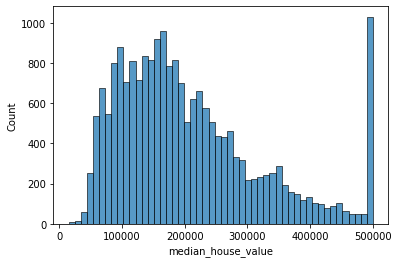

In [14]:
sns.histplot(df.median_house_value, bins=50)

In [16]:
df.population.median()

1166.0

In [105]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n

20637

In [19]:
n_val, n_test, n_train

(4127, 4127, 12383)

In [25]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [26]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20634, 20635, 20636])

In [27]:
np.random.seed(42)
np.random.shuffle(idx)

In [28]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
12378,-116.46,33.78,25.0,1137.0,414.0,604.0,240.0,1.3801,55000.0
12379,-116.46,33.78,33.0,2565.0,745.0,2301.0,638.0,2.5477,83000.0
12380,-116.47,33.77,26.0,4300.0,767.0,1557.0,669.0,4.4107,122500.0
12381,-116.47,33.78,27.0,1781.0,441.0,759.0,340.0,3.3162,113600.0


In [30]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
d_test = df.iloc[idx[n_train+n_val:]]

In [31]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16510,-121.16,37.73,7.0,4956.0,941.0,3006.0,915.0,3.4426,139000.0
16511,-121.25,37.76,22.0,2430.0,417.0,1292.0,391.0,3.4009,182400.0
16512,-121.22,37.72,34.0,2123.0,387.0,1310.0,368.0,2.6368,165600.0
16513,-121.22,37.81,17.0,2879.0,542.0,1802.0,530.0,3.6378,126100.0
16514,-121.22,37.80,28.0,2608.0,576.0,1719.0,554.0,2.1186,94400.0


In [32]:
len(df_train), len(df_val), len(df_test)

(12383, 4127, 4127)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = np.log1p(df_train['median_house_value'])
y_val =  np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value']) 

In [36]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [37]:
len(df_train), len(df_val), len(df_test)

(12383, 4127, 4127)

In [43]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        182
population              0
households              0
median_income           0
dtype: int64

In [40]:
df_val.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        19
population             0
households             0
median_income          0
dtype: int64

In [41]:
df_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        48
population             0
households             0
median_income          0
dtype: int64

In [56]:
df_train_mean = df_train.copy(deep=True)
df_val_mean = df_val.copy(deep=True)
df_test_mean = df_test.copy(deep=True)
df_train_zero = df_train.copy(deep=True)
df_val_zero = df_val.copy(deep=True)
df_test_zero = df_test.copy(deep=True)

In [57]:
df_train_mean.total_bedrooms = df_train.total_bedrooms.fillna(df_train.total_bedrooms.mean())
df_train_zero.total_bedrooms = df_train.total_bedrooms.fillna(0)
df_val_mean.total_bedrooms = df_train.total_bedrooms.fillna(df_train.total_bedrooms.mean())
df_val_zero.total_bedrooms = df_train.total_bedrooms.fillna(0)
df_test_mean.total_bedrooms = df_train.total_bedrooms.fillna(df_train.total_bedrooms.mean())
df_test_zero.total_bedrooms = df_train.total_bedrooms.fillna(0)

In [47]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [60]:
df_train_zero.values



array([[-1.2177e+02,  3.8670e+01,  4.5000e+01, ...,  1.4150e+03,
         5.1000e+02,  2.8351e+00],
       [-1.2232e+02,  3.7970e+01,  2.9000e+01, ...,  1.1350e+03,
         4.9000e+02,  3.9722e+00],
       [-1.1741e+02,  3.4000e+01,  2.6000e+01, ...,  1.6470e+03,
         6.1200e+02,  1.4719e+00],
       ...,
       [-1.1825e+02,  3.4090e+01,  5.2000e+01, ...,  1.2110e+03,
         4.1700e+02,  2.9350e+00],
       [-1.2203e+02,  3.7310e+01,  1.9000e+01, ...,  1.5200e+03,
         7.8400e+02,  3.3750e+00],
       [-1.2187e+02,  3.7300e+01,  2.8000e+01, ...,  4.5500e+02,
         2.1100e+02,  2.3293e+00]])

In [66]:
w0, w = train_linear_regression(df_train_zero.values, y_train)

y_pred_zero = w0 + df_train_zero.values.dot(w)

In [67]:
w0, w

(-11.517391266567552,
 array([-2.74319874e-01, -2.80424477e-01,  2.75670347e-03, -1.17727836e-05,
         1.83186689e-04, -2.08210388e-04,  5.51935567e-04,  1.72724833e-01]))

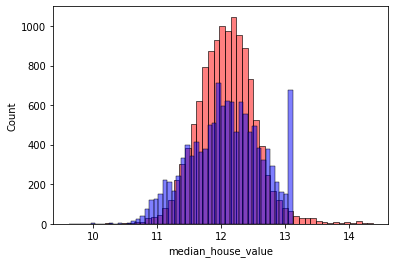

In [68]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [71]:
w0, w = train_linear_regression(df_train_mean.values, y_train)

y_pred_mean = w0 + df_train_mean.values.dot(w)

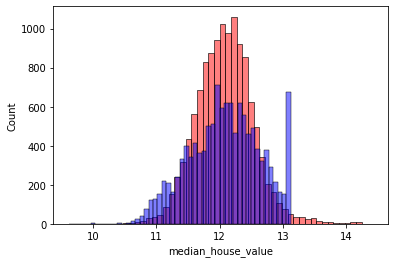

In [72]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

#RMSE

In [64]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [76]:
round(rmse(y_train, y_pred_zero),2)

0.34

In [77]:
round(rmse(y_train, y_pred_mean),2)

0.34

#Regularization

In [78]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
X_train = df_train_zero.values
r_param = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for i in r_param:
  w0, w = train_linear_regression_reg(X_train, y_train, r=i)
  X_val = df_val_zero.values
  y_pred = w0 + X_val.dot(w)
  
  print(f'{i}  - {rmse(y_val, y_pred)}')

0  - 0.3500414152343868
1e-06  - 0.35004140487245694
0.0001  - 0.3500403793024436
0.001  - 0.3500310900832352
0.01  - 0.3499415081178956
0.1  - 0.3493150262025915
1  - 0.34994211571393863
5  - 0.3531523000197059
10  - 0.35404864380119905


In [85]:
X_train = df_train_zero.values
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = df_val_zero.values
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = df_test_zero.values
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.3500310900832352
test: 0.3326011751969276


#Best regularization parameter r


In [86]:
seed_param = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [95]:
def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

In [101]:
rmse_list = []
for r in seed_param:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    
    y_train = np.log1p(df_train['median_house_value'])
    y_val = np.log1p(df_val['median_house_value'])
    y_test = np.log1p(df_test['median_house_value'])
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    
    w_0, w = train_linear_regression_reg(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.628132029552454 0.34
1 -11.674548246566076 0.34
2 -11.986445393300539 0.33
3 -11.515679244219632 0.34
4 -11.542712168562778 0.34
5 -11.399254508891241 0.35
6 -11.56113553902791 0.34
7 -12.17736295677579 0.34
8 -11.718527794879968 0.35
9 -11.704874422804364 0.33


In [98]:
#STD of RMSE scores for different seeds
np.round(np.std(rmse_list),3)

0.006

#RMSE on test


In [100]:
df_full = pd.concat([df_train, df_val])
X_full_train = prepare_X(df_full, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])

In [102]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [104]:
X_test = prepare_X(df_test, fillna_value=0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3463992478011119